In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel('HR Analytics Project.xls')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
df.sample(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
676,35,No,Travel_Rarely,1137,Research & Development,21,1,Life Sciences,1,942,...,4,80,1,10,2,1,10,6,0,7
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1448,41,No,Travel_Rarely,930,Sales,3,3,Life Sciences,1,2037,...,3,80,1,14,5,3,5,4,0,4
1367,27,No,Travel_Rarely,1354,Research & Development,2,4,Technical Degree,1,1931,...,3,80,1,6,3,2,5,3,1,2
1002,35,No,Travel_Frequently,200,Research & Development,18,2,Life Sciences,1,1412,...,3,80,0,10,2,3,2,2,2,2


In [4]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [5]:
df.shape

(1470, 35)

In [6]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
#checking null value
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# Visualization of Data:

<AxesSubplot:>

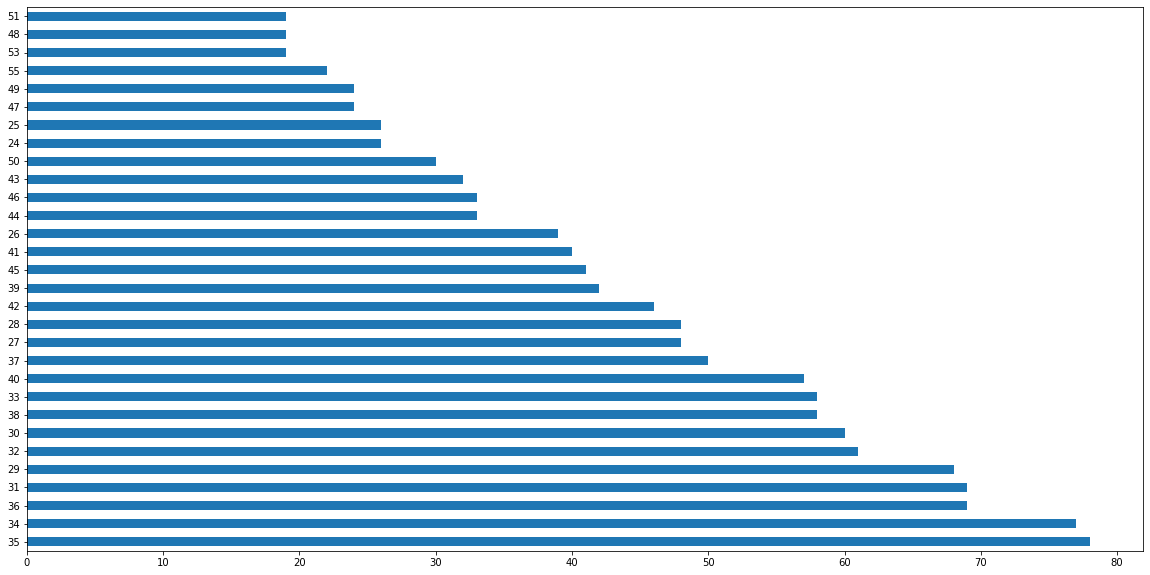

In [8]:
df['Age'].value_counts().head(30).plot(kind='barh', figsize=(20,10))

In [ ]:
maximum employee in between 30-40

<AxesSubplot:xlabel='Attrition', ylabel='count'>

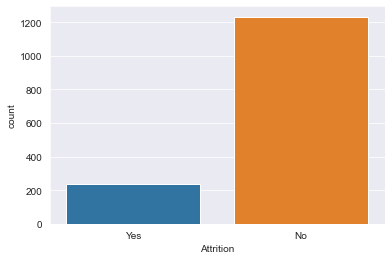

In [14]:
sns.set_style('darkgrid')
sns.countplot(x ='Attrition', data = df)

 No category is way greater than that belonging to Yes category. 

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

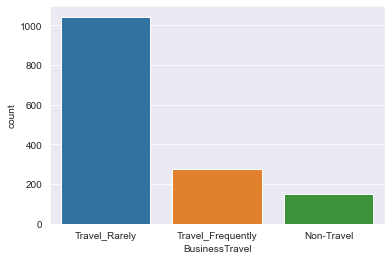

In [15]:
sns.set_style('darkgrid')
sns.countplot(x ='BusinessTravel', data = df)

The above plot shows that most of the people belong to the 'Travel_Rarely' class. 

<AxesSubplot:xlabel='OverTime', ylabel='count'>

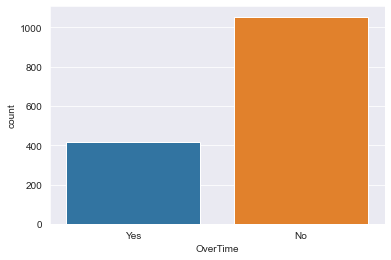

In [16]:
sns.set_style('darkgrid')
sns.countplot(x ='OverTime', data = df)

<AxesSubplot:xlabel='Department', ylabel='count'>

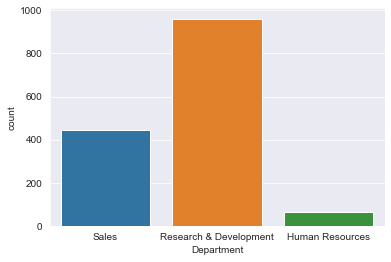

In [17]:
sns.set_style('darkgrid')
sns.countplot(x ='Department', data = df)

<AxesSubplot:xlabel='EducationField', ylabel='count'>

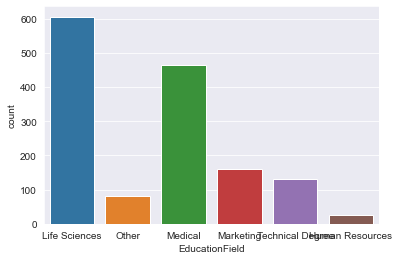

In [18]:
sns.set_style('darkgrid')
sns.countplot(x ='EducationField', data = df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

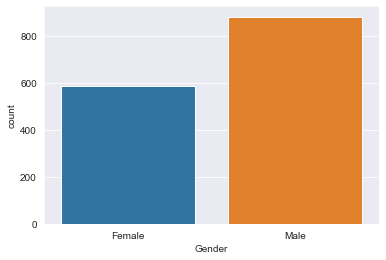

In [19]:
sns.set_style('darkgrid')
sns.countplot(x ='Gender', data = df)

males are presnt in higher number.

<AxesSubplot:>

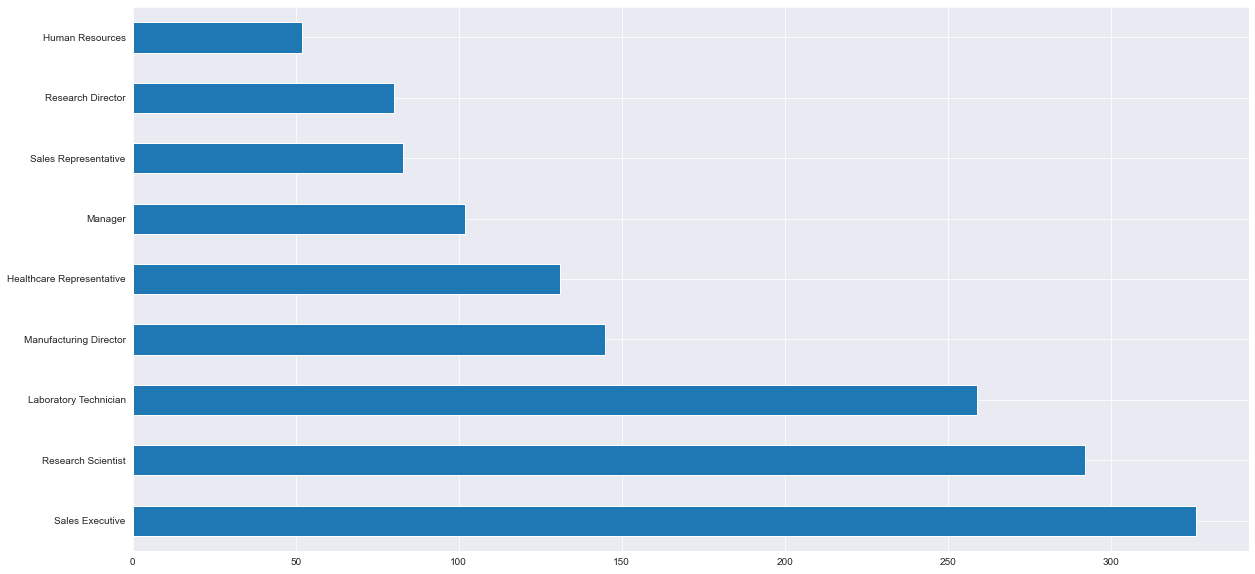

In [26]:
df['JobRole'].value_counts().head(30).plot(kind='barh', figsize=(20,10))

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='count'>

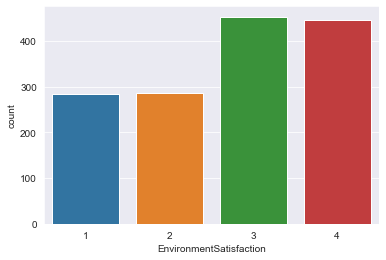

In [34]:
sns.set_style('darkgrid')
sns.countplot(x ='EnvironmentSatisfaction', data = df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

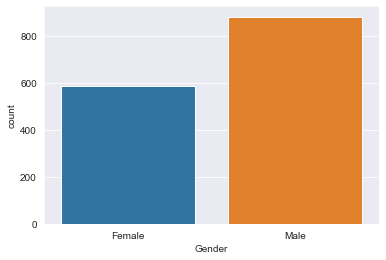

In [35]:
sns.set_style('darkgrid')
sns.countplot(x ='Gender', data = df)

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

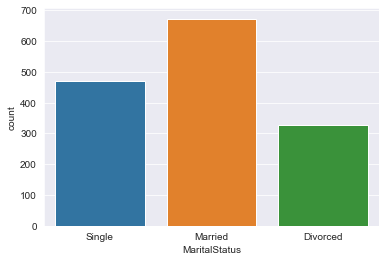

In [39]:
sns.set_style('darkgrid')
sns.countplot(x ='MaritalStatus', data = df)

maximum employee are married

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='count'>

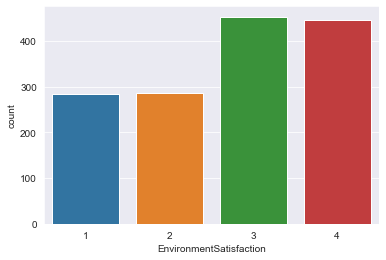

In [45]:
sns.set_style('darkgrid')
sns.countplot(x ='EnvironmentSatisfaction', data = df)

<AxesSubplot:xlabel='JobInvolvement', ylabel='count'>

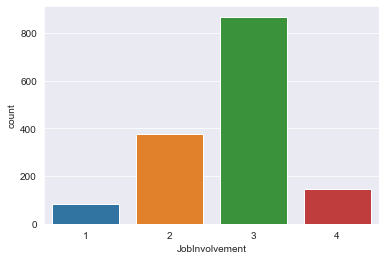

In [46]:
sns.set_style('darkgrid')
sns.countplot(x ='JobInvolvement', data = df)

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

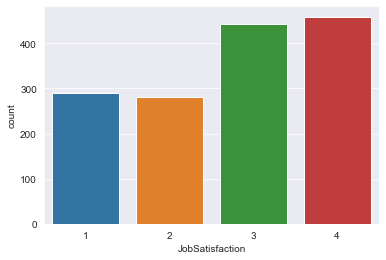

In [47]:
sns.set_style('darkgrid')
sns.countplot(x ='JobSatisfaction', data = df)

<AxesSubplot:xlabel='WorkLifeBalance', ylabel='count'>

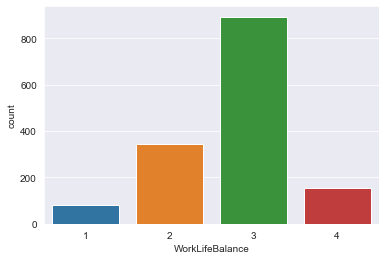

In [48]:
sns.set_style('darkgrid')
sns.countplot(x ='WorkLifeBalance', data = df)

<AxesSubplot:xlabel='RelationshipSatisfaction', ylabel='count'>

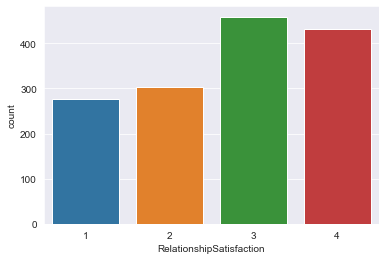

In [49]:
sns.set_style('darkgrid')
sns.countplot(x ='RelationshipSatisfaction', data = df)

<AxesSubplot:xlabel='PerformanceRating', ylabel='count'>

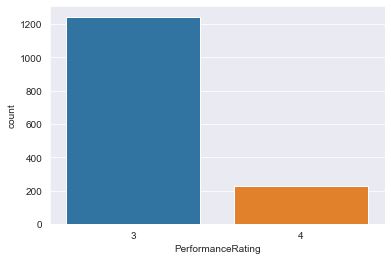

In [50]:
sns.set_style('darkgrid')
sns.countplot(x ='PerformanceRating', data = df)

<AxesSubplot:>

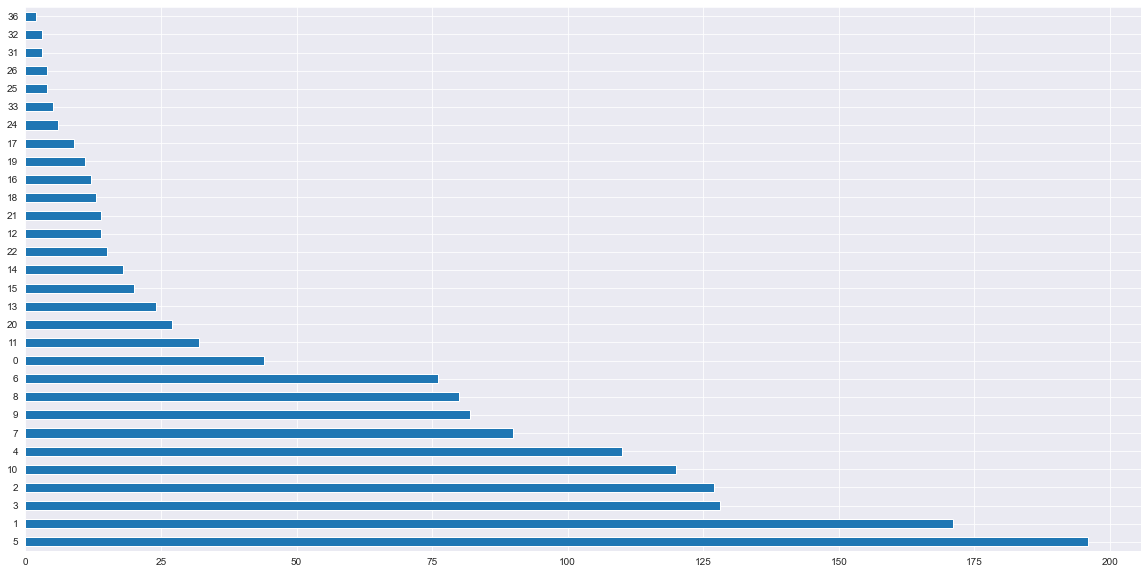

In [52]:
df['YearsAtCompany'].value_counts().head(30).plot(kind='barh', figsize=(20,10))

mmaximum employees are between 5-10 year 

<AxesSubplot:>

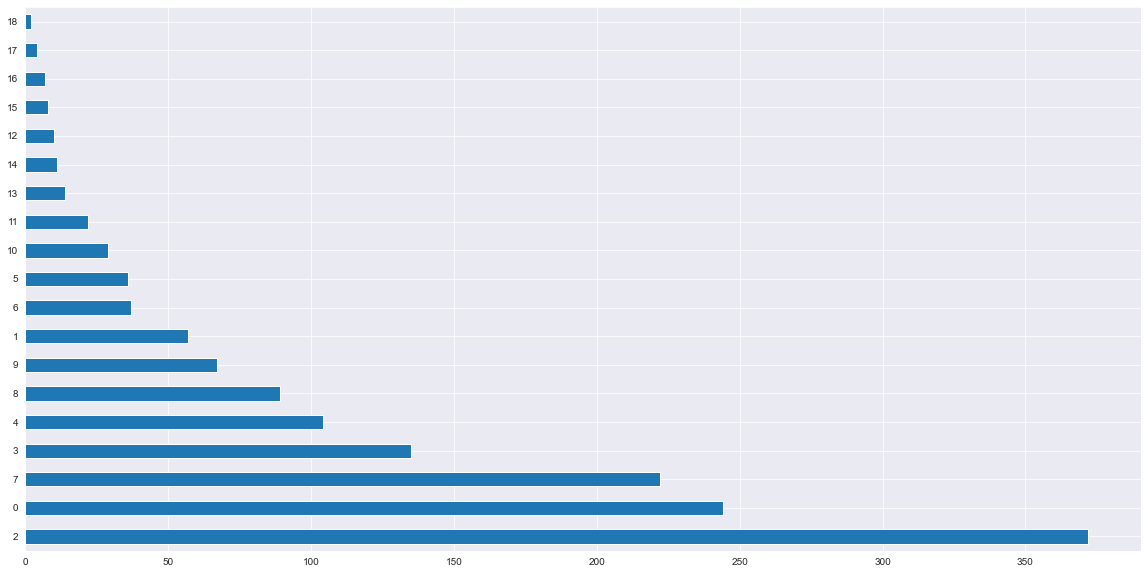

In [53]:
df['YearsInCurrentRole'].value_counts().head(30).plot(kind='barh', figsize=(20,10))

<AxesSubplot:>

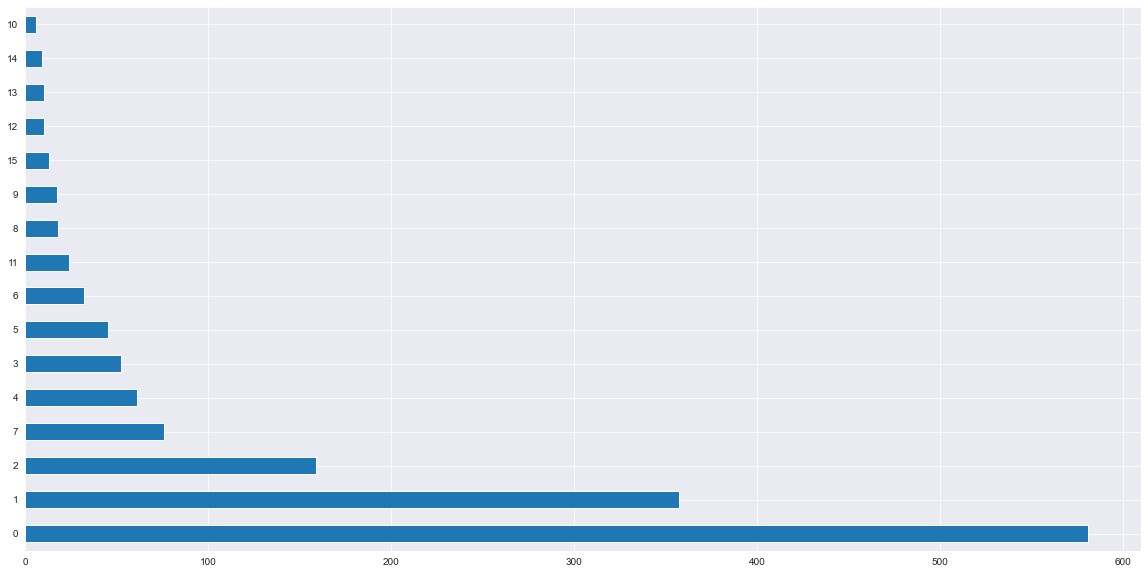

In [54]:
df['YearsSinceLastPromotion'].value_counts().head(30).plot(kind='barh', figsize=(20,10))

YearsSinceLastPromotion and YearsInCurrentRole shows that so many employee did not get promotion from last so many year 

# Checking Correlation

In [55]:
type(df.corr())

pandas.core.frame.DataFrame

<AxesSubplot:>

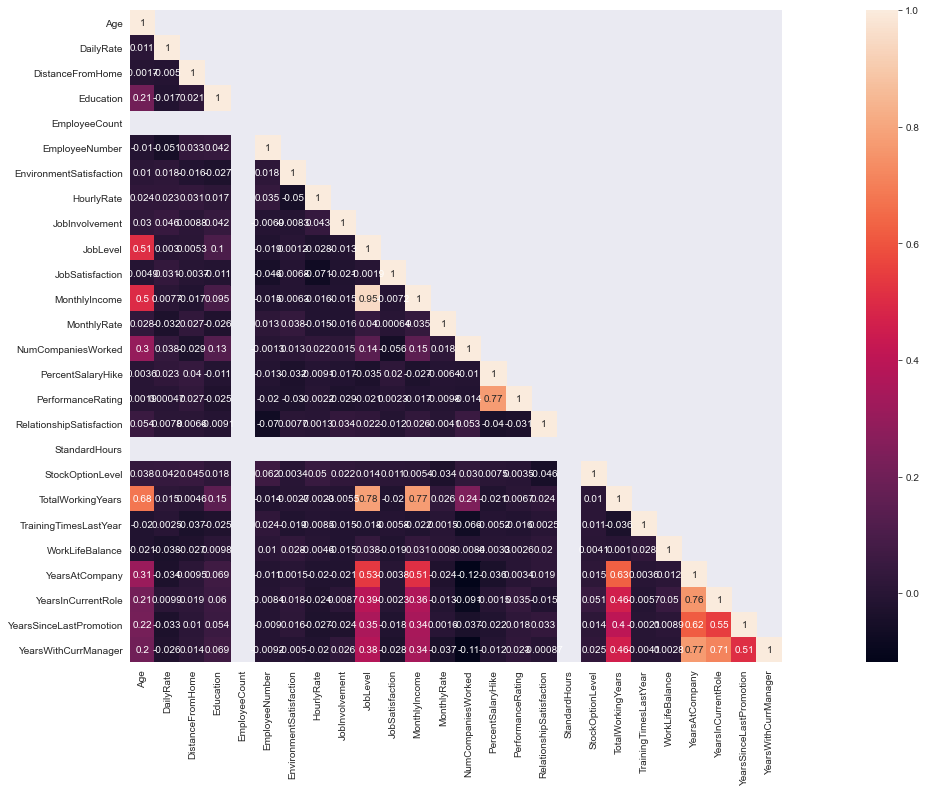

In [57]:
cor_mat= df.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

JobLevel is highly correlated to Age as expected aged employees generally occupy higher positions in the company.

MonthlyIncome is very strongly correlated to joblevel as expected as senior employees will definately earn more.

PerformanceRating is highly correlated to PercentSalaryHike which is quite obvious.

TotalWorkingYears is highly correlated to JobLevel which is expected as senior employees must have worked for a larger span of time.

YearsWithCurrManager is highly correlated to YearsAtCompany.

YearsAtCompany is correlated to YearsInCurrentRole.

# Features against the 'Target' variable.

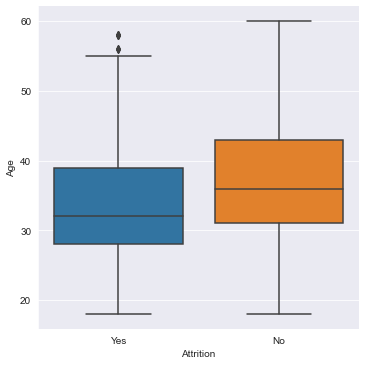

In [77]:
sns.catplot(data=df,y='Age',x='Attrition',height=5,aspect=1,kind='box')

 peole with higher age have lesser tendency to leave the organisation

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

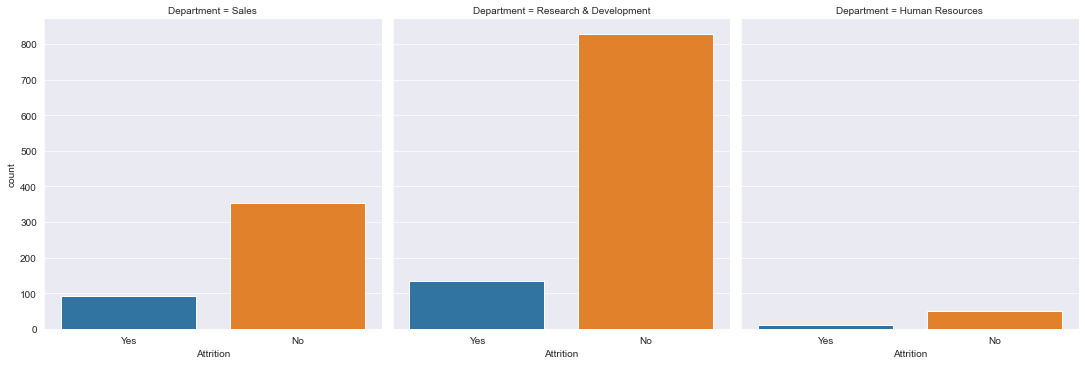

In [79]:
sns.catplot(data=df,kind='count',x='Attrition',col='Department')
df.Department.value_counts()

In [84]:
pd.crosstab(columns=[df.Attrition],index=[df.Department],margins=True,normalize='index')

Attrition,No,Yes
Department,,
Human Resources,0.809524,0.190476
Research & Development,0.861602,0.138398
Sales,0.793722,0.206278
All,0.838776,0.161224


81 % of the people in HR dont want to leave the organisation and only 19 % want to leave.

In [85]:
pd.crosstab(columns=[df.Attrition],index=[df.Gender],margins=True,normalize='index')

Attrition,No,Yes
Gender,,
Female,0.852041,0.147959
Male,0.829932,0.170068
All,0.838776,0.161224


 84 % of employees want to be in the organisation ,16 % want to leave the organisation.

2342     4
6142     3
2610     3
2559     3
6347     3
        ..
4103     1
2705     1
6796     1
19717    1
10239    1
Name: MonthlyIncome, Length: 1349, dtype: int64

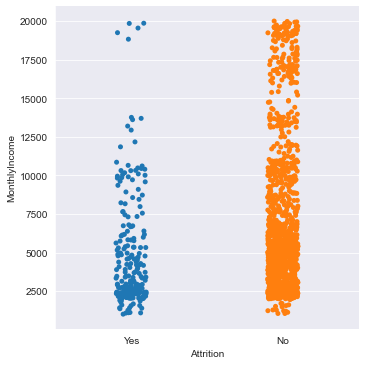

In [93]:
sns.catplot(data=df,kind='strip',x='Attrition',y='MonthlyIncome')

df.MonthlyIncome.value_counts()

those employees who are probably not earning well will certainly want to change the company.

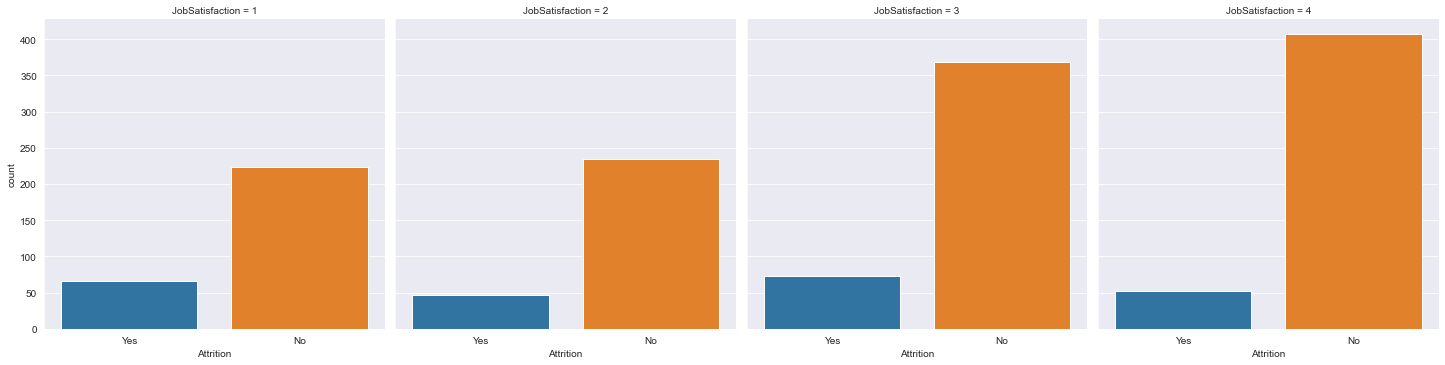

In [96]:
sns.catplot(data=df,kind='count',x='Attrition',col='JobSatisfaction')

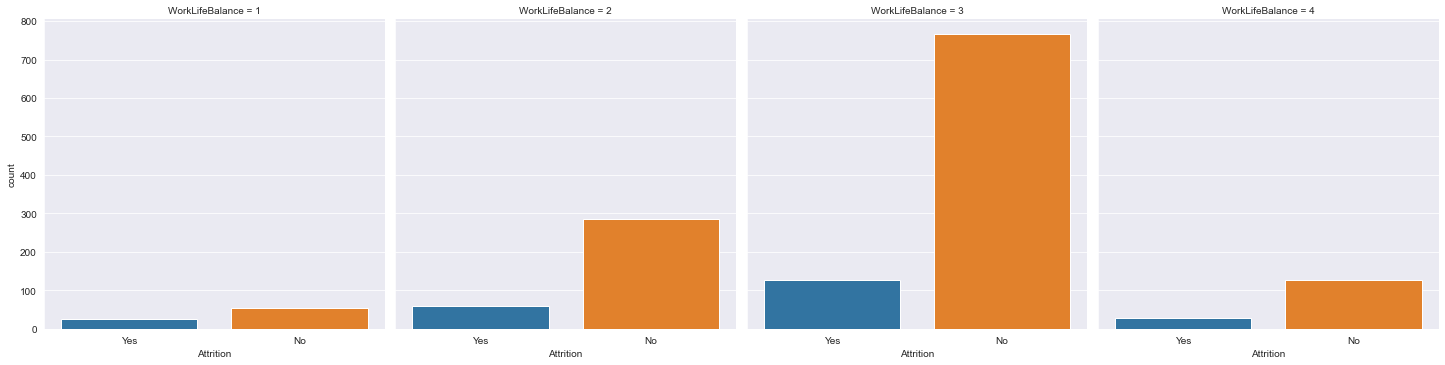

In [97]:
sns.catplot(data=df,kind='count',x='Attrition',col='WorkLifeBalance')

# Encoading of DataFrame

we can see skewness in most of the columns of our dataset we will remove the skewness using power transform function

In [9]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [10]:
for i in df.columns:
    if df[i].dtype=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [11]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1.0,2.0,1102,2.0,1,2,1.0,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0.0,1.0,279,1.0,8,1,1.0,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1.0,2.0,1373,1.0,2,2,4.0,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0.0,1.0,1392,1.0,3,4,1.0,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0.0,2.0,591,1.0,2,1,3.0,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0.0,1.0,884,1.0,23,2,3.0,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0.0,2.0,613,1.0,6,1,3.0,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0.0,2.0,155,1.0,4,3,1.0,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0.0,1.0,1023,2.0,2,3,3.0,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [12]:
df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,1.0,2068.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


<AxesSubplot:>

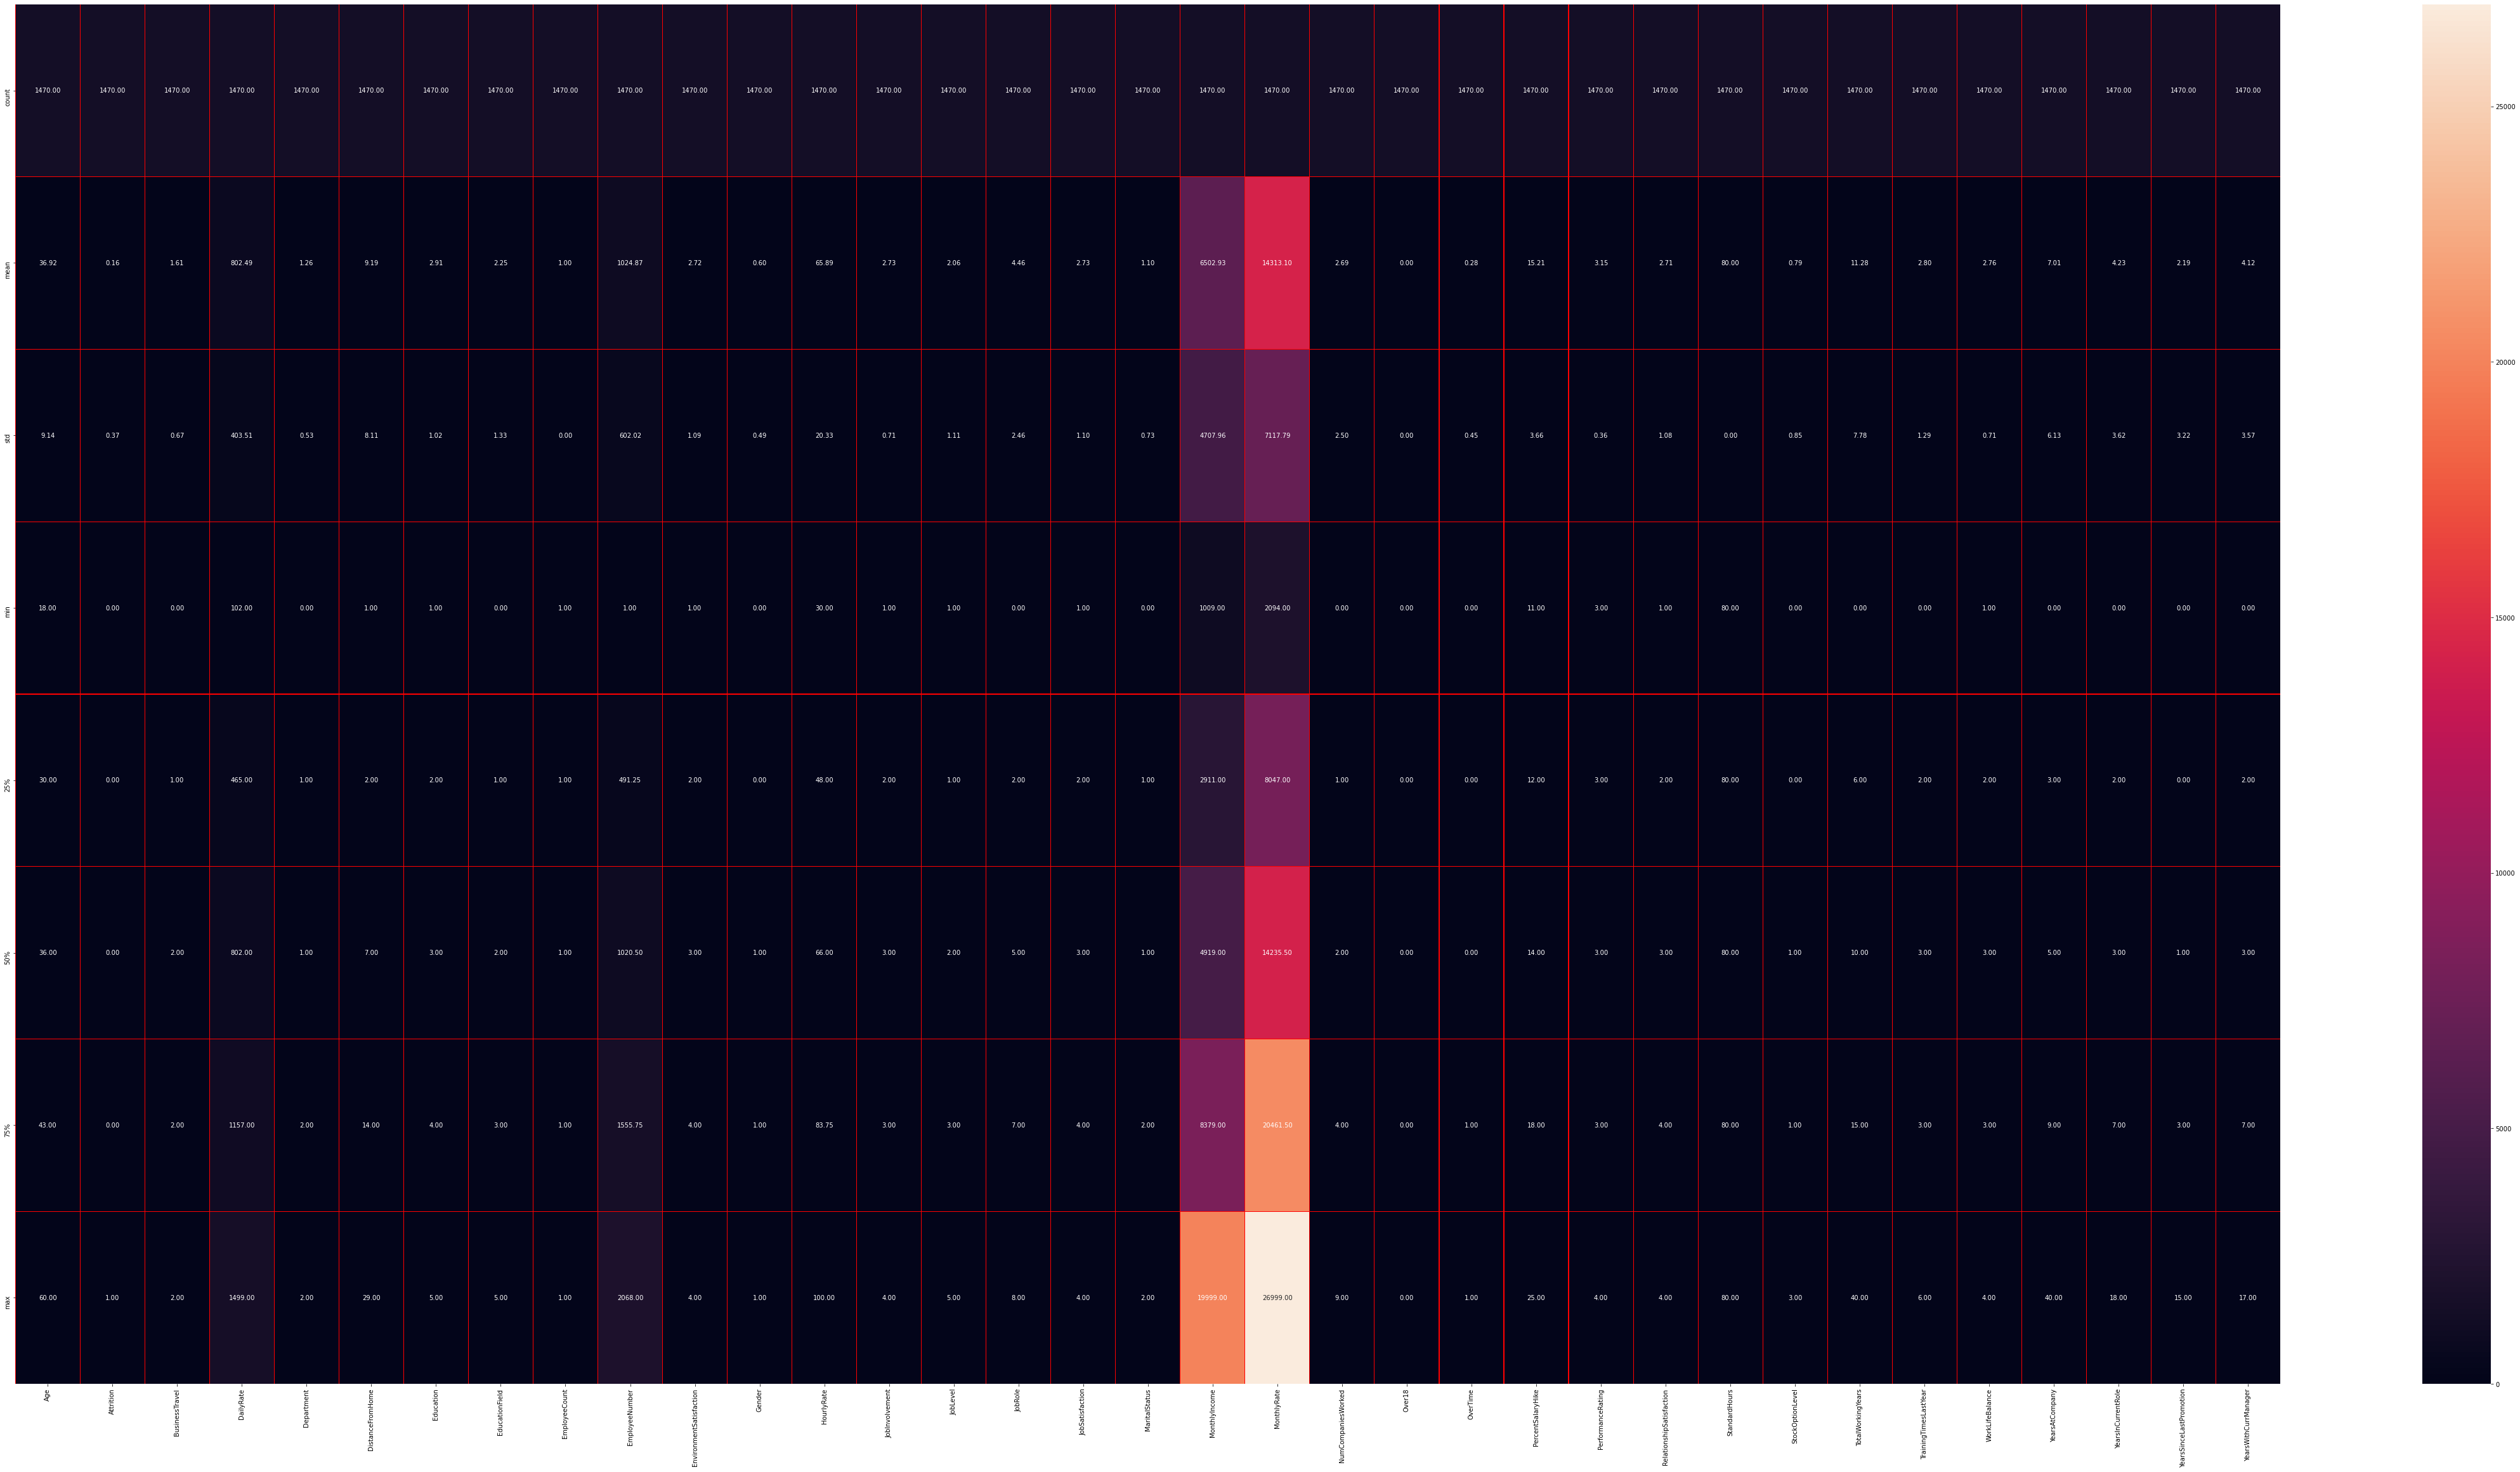

In [13]:
# heat map for describe function
plt.figure(figsize=[80,40])
sns.heatmap(df.describe(),annot=True,linewidth=0.1,linecolor='red',fmt='0.2f')

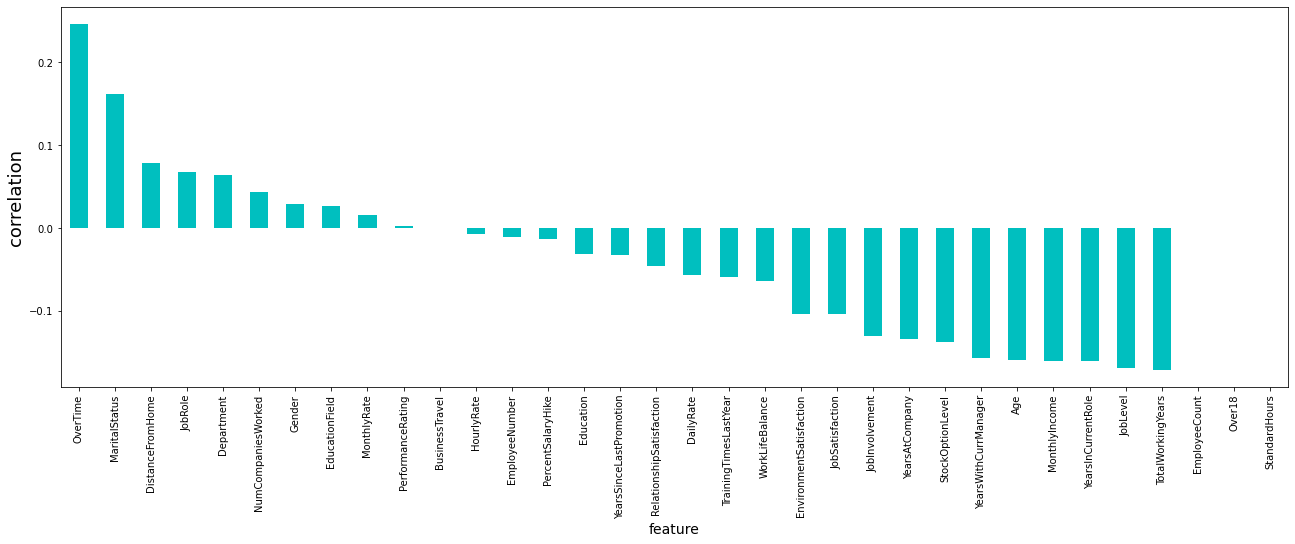

In [14]:
plt.figure(figsize=(22,7))
df.corr()['Attrition'].sort_values(ascending=False).drop(['Attrition']).plot(kind='bar',color='c')
plt.xlabel('feature',fontsize=14)
plt.ylabel('correlation',fontsize=18)
plt.show()

# Checking Outliers

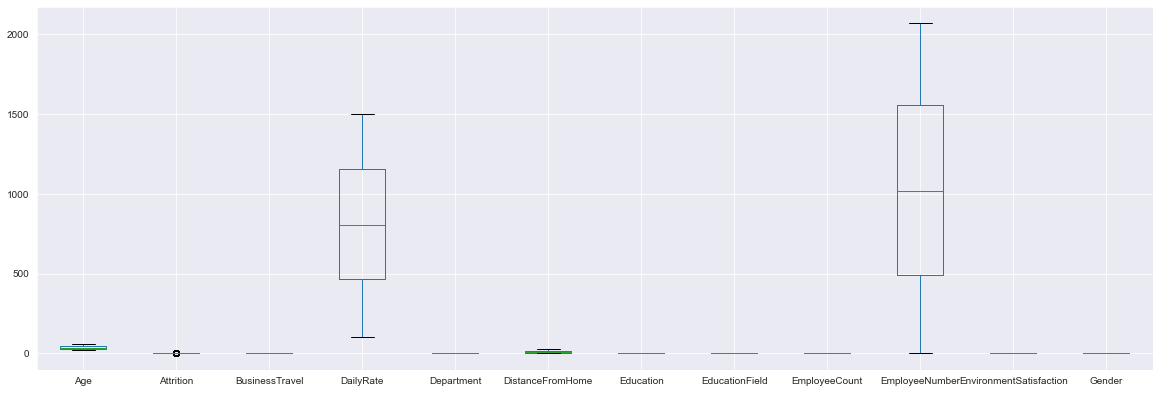

In [113]:
#plotting boxplots for first 12 columns
df.iloc[:,0:12].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

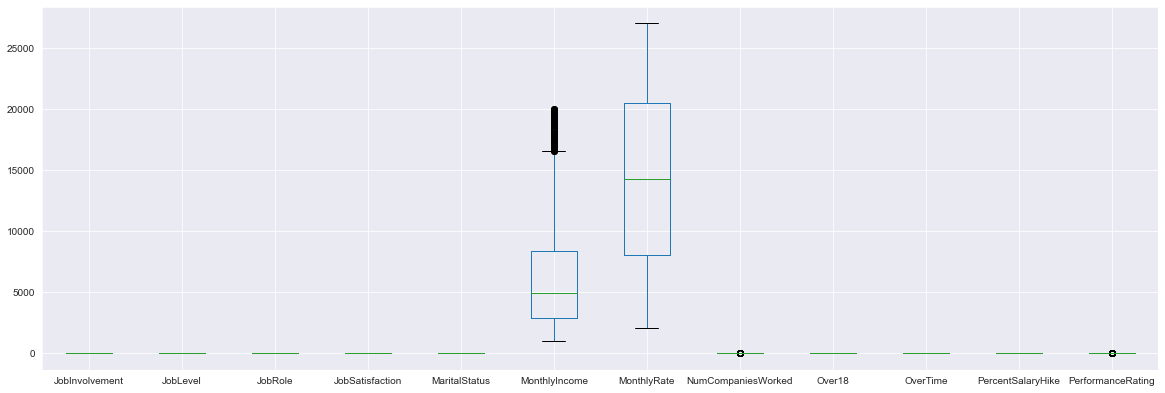

In [114]:
#plotting boxplots for first 13-25 columns
df.iloc[:,13:25].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

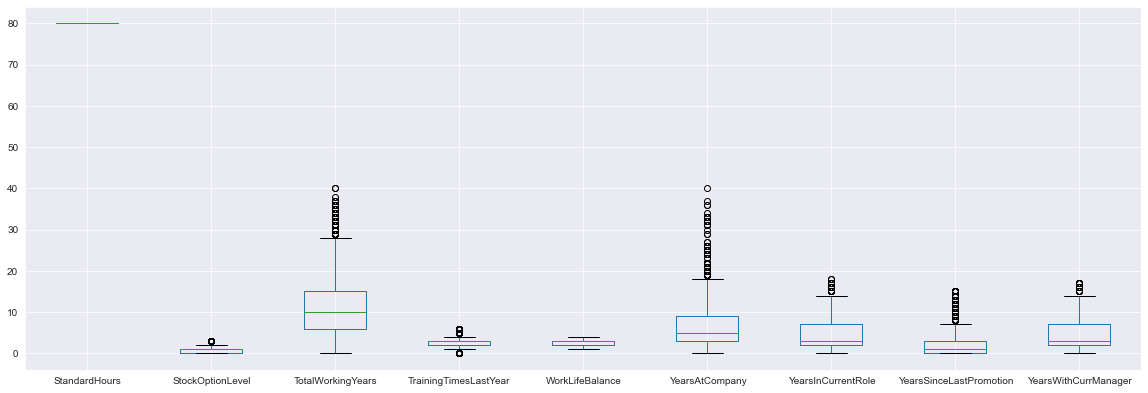

In [115]:
#plotting boxplots for first rest columns
df.iloc[:,26:].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

 'MonthlyIncome', 'NumCompaniesWorked','PerformanceRating', 'StockOptionLevel','TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager' having outliers

In [120]:
df.shape

(1470, 35)

In [121]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
         123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
         218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
         401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
         561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
         677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
         875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
         962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
        1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
        1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
       dtype=int64),
 array([34, 33, 31, 33, 32, 33, 28, 28, 31, 33, 32, 33, 34, 28, 31, 33, 34,
        33, 28, 34, 31, 32, 33, 32, 34, 31, 33, 28, 31, 32, 33, 33, 34, 28,
        31, 31, 33, 33, 28, 32, 31, 31, 33, 31, 34, 33, 31, 28, 31, 33, 34,
        28

 it is showing very big data having value grater than 3 because all the data is categorical

In [123]:
df_new_z=df[(z<3).all(axis=1)]

In [124]:
# after removing outliers shape of data
df_new_z.shape

(0, 35)

In [129]:
#checking skewness
df.skew().sort_values(ascending=False)

YearsSinceLastPromotion     1.984290
PerformanceRating           1.921883
Attrition                   1.844366
YearsAtCompany              1.764529
MonthlyIncome               1.369817
TotalWorkingYears           1.117172
NumCompaniesWorked          1.026471
JobLevel                    1.025401
StockOptionLevel            0.968980
OverTime                    0.964489
DistanceFromHome            0.958118
YearsInCurrentRole          0.917363
YearsWithCurrManager        0.833451
PercentSalaryHike           0.821128
TrainingTimesLastYear       0.553124
EducationField              0.550371
Age                         0.413286
Department                  0.172231
MonthlyRate                 0.018578
EmployeeNumber              0.016574
StandardHours               0.000000
Over18                      0.000000
EmployeeCount               0.000000
DailyRate                  -0.003519
HourlyRate                 -0.032311
MaritalStatus              -0.152175
Education                  -0.289681
R

Keeping +/- 0.65 as the range of skewness, here are the column which does not lie with in this range

In [130]:
from sklearn.preprocessing import power_transform, PowerTransformer

In [132]:
PowerTransformer()
df_new=power_transform(df)

In [133]:
df_new

array([[ 0.52213976,  2.28090588,  0.63546836, ...,  0.2055623 ,
        -1.09486169,  0.49014719],
       [ 1.27641097, -0.4384223 , -1.39286498, ...,  0.883888  ,
         0.09685415,  0.90963491],
       [ 0.10209148,  2.28090588,  0.63546836, ..., -1.59643394,
        -1.09486169, -1.55015588],
       ...,
       [-1.12375507, -0.4384223 ,  0.63546836, ..., -0.44664507,
        -1.09486169, -0.05300033],
       [ 1.27641097, -0.4384223 , -1.39286498, ...,  0.68299511,
        -1.09486169,  1.09011007],
       [-0.23618832, -0.4384223 ,  0.63546836, ..., -0.08961473,
         0.09685415, -0.40688122]])

In [135]:
#Checking skewness
pd.DataFrame(df_new,columns=df.columns).skew().sort_values(ascending=False)

Attrition                   1.844366
OverTime                    0.964489
YearsSinceLastPromotion     0.212129
PercentSalaryHike           0.116250
JobLevel                    0.103624
StockOptionLevel            0.087019
TrainingTimesLastYear       0.058058
MonthlyIncome               0.032831
NumCompaniesWorked          0.014814
Department                  0.013801
Over18                      0.000000
StandardHours               0.000000
EmployeeCount               0.000000
PerformanceRating           0.000000
DistanceFromHome           -0.007468
Age                        -0.007603
EducationField             -0.008386
YearsAtCompany             -0.008683
TotalWorkingYears          -0.010653
WorkLifeBalance            -0.012286
JobInvolvement             -0.020365
YearsInCurrentRole         -0.060849
YearsWithCurrManager       -0.067565
Education                  -0.099881
HourlyRate                 -0.106461
MaritalStatus              -0.156911
MonthlyRate                -0.184087
R

# Feature Scaling

In [17]:
df.drop(['BusinessTravel','DailyRate','EmployeeCount','EmployeeNumber','HourlyRate','MonthlyRate'
           ,'NumCompaniesWorked','Over18','StandardHours', 'StockOptionLevel','TrainingTimesLastYear'],axis=1,inplace=True)

In [18]:
x=df.drop('Attrition',axis=1)
y=df['Attrition']

In [19]:
x

,Age,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,...,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2.0,1,2,1.0,2,0.0,3,2,7.0,...,1.0,11,3,1,8,1,6,4,0,5
1,49,1.0,8,1,1.0,3,1.0,2,2,6.0,...,0.0,23,4,4,10,3,10,7,1,7
2,37,1.0,2,2,4.0,4,1.0,2,1,2.0,...,1.0,15,3,2,7,3,0,0,0,0
3,33,1.0,3,4,1.0,4,0.0,3,1,6.0,...,1.0,11,3,3,8,3,8,7,3,0
4,27,1.0,2,1,3.0,1,1.0,3,1,2.0,...,0.0,12,3,4,6,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1.0,23,2,3.0,3,1.0,4,2,2.0,...,0.0,17,3,3,17,3,5,2,0,3
1466,39,1.0,6,1,3.0,4,1.0,2,3,0.0,...,0.0,15,3,1,9,3,7,7,1,7
1467,27,1.0,4,3,1.0,2,1.0,4,2,4.0,...,1.0,20,4,2,6,3,6,2,0,3
1468,49,2.0,2,3,3.0,4,1.0,2,2,7.0,...,0.0,14,3,4,17,2,9,6,0,8


In [20]:
y

0       1.0
1       0.0
2       1.0
3       0.0
4       0.0
       ... 
1465    0.0
1466    0.0
1467    0.0
1468    0.0
1469    0.0
Name: Attrition, Length: 1470, dtype: float64

In [21]:
y.unique()

array([1., 0.])

In [22]:
y.value_counts()

0.0    1233
1.0     237
Name: Attrition, dtype: int64

Total number of(0)is high value are 1233 that is not equvalent to 1, hence lets just make it balence by sing SMOTE technique

<AxesSubplot:xlabel='Attrition', ylabel='count'>

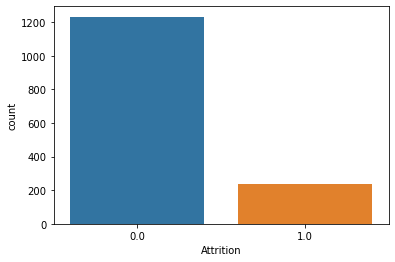

In [23]:
sns.countplot(y)

In [24]:
import sklearn
sklearn.__version__

'1.1.1'

In [25]:
import numpy
numpy.__version__

'1.20.1'

In [26]:
!pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE

In [27]:
smt=SMOTE()
trainx,trainy=smt.fit_resample(x,y)

In [28]:
#y.value_counts()
trainx.value_counts()

Age  Department  DistanceFromHome  Education  EducationField  EnvironmentSatisfaction  Gender    JobInvolvement  JobLevel  JobRole  JobSatisfaction  MaritalStatus  MonthlyIncome  OverTime  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  TotalWorkingYears  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager
31   1.0         14                2          3.000000        2                        1.000000  2               1         6.0      1                2.0            2318           1.000000  21                 4                  1                         4                  3                2               2                   1                        2                       2
38   1.0         29                3          5.000000        4                        1.000000  3               2         4.0      4                1.0            6261           0.000000  18                 3                  1                         

In [29]:
trainy.value_counts()

0.0    1233
1.0    1233
Name: Attrition, dtype: int64

In [30]:
trainy

0       1.0
1       0.0
2       1.0
3       0.0
4       0.0
       ... 
2461    1.0
2462    1.0
2463    1.0
2464    1.0
2465    1.0
Name: Attrition, Length: 2466, dtype: float64

<AxesSubplot:xlabel='Attrition', ylabel='count'>

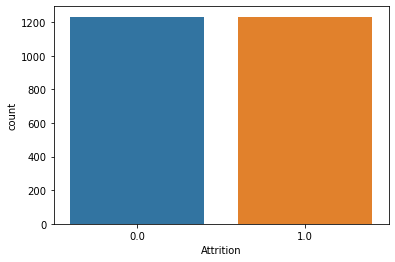

In [31]:
sns.countplot(trainy)

In [32]:
x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,test_size=.30,random_state=45)

# Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

LR=LogisticRegression()
LR.fit(x_train,y_train)
predlr=LR.predict(x_test)
print("Accuracy", accuracy_score(y_test, predlr)*100) # testing accuracy
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy 69.86486486486486
[[265 109]
 [114 252]]
              precision    recall  f1-score   support

         0.0       0.70      0.71      0.70       374
         1.0       0.70      0.69      0.69       366

    accuracy                           0.70       740
   macro avg       0.70      0.70      0.70       740
weighted avg       0.70      0.70      0.70       740



# Decision Tree Classifier

In [35]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print("Accuracy", accuracy_score(y_test, predlr)*100) # testing accuracy
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))


Accuracy 69.86486486486486
[[317  57]
 [ 39 327]]
              precision    recall  f1-score   support

         0.0       0.89      0.85      0.87       374
         1.0       0.85      0.89      0.87       366

    accuracy                           0.87       740
   macro avg       0.87      0.87      0.87       740
weighted avg       0.87      0.87      0.87       740



# Randome Forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier
#seed =10
rf= RandomForestClassifier(n_estimators=400)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("Accuracy", accuracy_score(y_test, predrf)*100) # testing accuracy
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy 93.64864864864865
[[362  12]
 [ 35 331]]
              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94       374
         1.0       0.97      0.90      0.93       366

    accuracy                           0.94       740
   macro avg       0.94      0.94      0.94       740
weighted avg       0.94      0.94      0.94       740



# SVC

In [37]:
from sklearn.svm import SVC

svc=SVC()
svc.fit(x_train,y_train)
predsvc=rf.predict(x_test)
print("Accuracy", accuracy_score(y_test, predsvc)*100) # testing accuracy
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

Accuracy 93.64864864864865
[[362  12]
 [ 35 331]]
              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94       374
         1.0       0.97      0.90      0.93       366

    accuracy                           0.94       740
   macro avg       0.94      0.94      0.94       740
weighted avg       0.94      0.94      0.94       740



random forest and SVC are producing good accuracy , now we will check the cross validation score as well for outfitting (if exists)

# Cross validation

In [213]:
from sklearn.model_selection import cross_val_score

#validation accuracy
scr=cross_val_score(LR, x, y, cv=9)
print("Cross validation score of Logistic Regression Model", scr.mean())

Cross validation score of Logistic Regression Model 0.8449216087252898


 in cross validation the accracy is .84% but in RandomForestClassifier model th eaccracy is 93%. it shows the over fitting the data,

In [214]:
# cross validation on decision tree algo
# validation accuracy

from sklearn.model_selection import cross_val_score
scr=cross_val_score(dt, x, y, cv=7)
print("Cross validation score of Decision Tree Model", scr.mean())

Cross validation score of Decision Tree Model 0.7904761904761904


In [215]:
scr=cross_val_score(rf, x, y, cv=9)
print("Cross validation score of Random Forest Model", scr.mean())

Cross validation score of Random Forest Model 0.8557866560260695


RandomForestClassifier is performing better among all so we will continue with RandomForestClassifier

# Hyper parameter tuning

In [216]:
RandomForestClassifier()

RandomForestClassifier()

In [217]:
from sklearn.model_selection import GridSearchCV

#Creating parameter list to pass in GridSearchCV
parameters={'max_features':['auto', 'sqrt', 'log2'],
           'max_depth':[4,5,6,7,8],
           'criterion': ['gini', 'entropy'],
           'n_estimators': [100,200,300,400,500]}

In [219]:
GCV=GridSearchCV(RandomForestClassifier(), parameters, cv=7, scoring="accuracy")
GCV.fit(x_train,y_train) # Fitting the data in model 
GCV.best_params_  # printing the best parameter fond by GridSearchCV

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 100}

In [220]:
type(GCV)

sklearn.model_selection._search.GridSearchCV

In [221]:
GCV.best_estimator_

RandomForestClassifier(max_depth=8, max_features='auto')

In [222]:
GCV_pred=GCV.best_estimator_.predict(x_test) # Predicting the best parameter
accuracy_score(y_test,GCV_pred)# checking final accuracy

0.918918918918919

# ROC AUC Plot

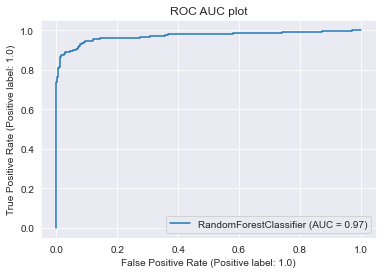

In [223]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title("ROC AUC plot")
plt.show()

 AUC score is 97% which is pretty good

# Saving the model in pickle Format

In [224]:
# pickeling of the file or serialization of a file
import joblib
joblib.dump(GCV.best_estimator_,"HR_Analytics .pkl")

['HR_Analytics .pkl']